# KNN Online News Sharing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv("OnlineNewsPopularity.csv")
median = df[' shares'].median()
df[' shares'] = np.where(df[' shares']>=median, 1, 0)

### Dropping features that are not required
### Dropping features that may lead to "Dummy variable trap"


In [3]:
df.drop(["url"," timedelta"],axis =1,inplace=True)
df.drop([" weekday_is_sunday"," weekday_is_saturday"," LDA_04"],axis =1,inplace=True)

In [4]:
cols = df.shape[1]

features = df.iloc[:,:cols-1]
response = df.iloc[:,cols-1:cols]

X_train, X_test, y_train, y_test = train_test_split(features,response,test_size=0.3,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)


In [5]:
# Fitting K-NN to the Training set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


print('Train accuracy = {0}%'.format(np.round(classifier.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(classifier.score(X_test, y_test) * 100, 2)))
predictions = classifier.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Train accuracy = 73.67%
Test accuracy = 60.12%

 Confusion Matrix: 

[[3293 2292]
 [2451 3858]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.57      0.59      0.58      5585
          1       0.63      0.61      0.62      6309

avg / total       0.60      0.60      0.60     11894



# Experiment 1 

## Number of neighbours in KNN

In [8]:
accuracy_validation = [None]*16



count=0    
for noOfNeighbours in range(151,0,-10):
    # Fitting K-NN to the Training set
    classifier = KNeighborsClassifier(n_neighbors = noOfNeighbours, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    accuracy_validation[count] = classifier.score(X_val,y_val)  
    count+=1

Text(0,0.5,'Accuracy on Validation Set')

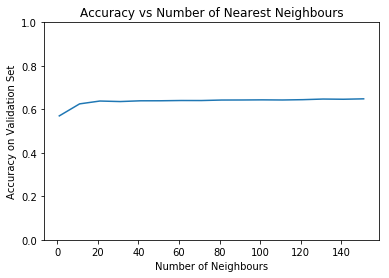

In [9]:
plt.ylim([0,1])
plt.plot(range(151,0,-10),accuracy_validation)
plt.title("Accuracy vs Number of Nearest Neighbours")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy on Validation Set")


## As we see, No significant change in Accuracy as Number of Neighbours decrease

## So we will keep the nearest Neighbors as max value = 150 , because lower the 



# Experiment 2 
## Changing the different metrics for KNN Classifier

In [5]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
metric = ["euclidean","manhattan","hamming"]
accuracy_validation = [None]*3
count=0
for p in range(0,3):
    classifier = KNeighborsClassifier(n_neighbors = 150, metric = metric[p])
    classifier.fit(X_train, y_train)
    accuracy_validation[count] = classifier.score(X_val,y_val)
    count+=1

Text(0,0.5,'Accuracy on Validation Set')

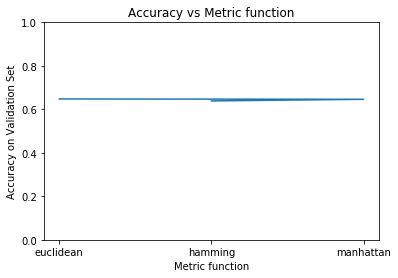

In [6]:
plt.ylim([0,1])
plt.plot(metric,accuracy_validation)
plt.title("Accuracy vs Metric function")
plt.xlabel("Metric function")
plt.ylabel("Accuracy on Validation Set")

## As we see, Euclidean has a better accuracy in this scenario
## so we use Euclidean Metric in our K-NN Model

# Cross Validation Scores


In [11]:
from sklearn.model_selection import cross_val_score

In [40]:
classifier = KNeighborsClassifier(n_neighbors = 150, metric ='minkowski',p=2)

r, c = y_train.shape

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train.values.reshape(r,),cv=10)

## 10 fold CV Accuracy Mean

In [44]:
accuracies.mean()

0.6463306599809442

## 10 fold CV Accuracy Standard Deviation


In [45]:
accuracies.std()

0.013797096264431869